This notebook generates Figure S1

In [1]:
import pandas as pd
import os
from os import path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('ticks')

plt.rcParams['svg.fonttype'] = 'none'

# Load data

In [2]:
org_dir = path.join('../../data/interim/')
DF_metadata = pd.read_csv("../../data/raw_data/Pseudomonas_putida_2020-08-31.tsv", sep='\t', index_col=0)
DF_metadata_passed = pd.read_csv(os.path.join(org_dir,'metadata_qc.csv'),index_col=0)
DF_log_tpm = pd.read_csv(os.path.join(org_dir,'log_tpm_qc.csv'),index_col=0)
DF_metadata_preQC = pd.read_csv('../../data/interim/metadata_preQC.csv')

# Fig S1A. QC

In [3]:
QC_PI = [DF_metadata.index.size,
         DF_metadata_preQC[DF_metadata_preQC.passed_fastqc==True].index.size,
         DF_metadata_preQC[(DF_metadata_preQC.passed_fastqc==True) & (DF_metadata_preQC.passed_reads_mapped_to_CDS==True)].index.size,
        DF_metadata_preQC[(DF_metadata_preQC.passed_fastqc==True) & (DF_metadata_preQC.passed_reads_mapped_to_CDS==True) & (DF_metadata_preQC.passed_global_correlation==True) & (DF_metadata_preQC.KT2440==True)].index.size,
        DF_metadata_passed.index.size
        ]

In [4]:
QC_area = [QC_PI[0]-QC_PI[1], QC_PI[1]-QC_PI[2], QC_PI[2]-QC_PI[3], QC_PI[3]-QC_PI[4], QC_PI[4]]

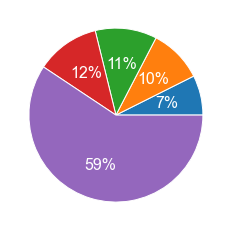

In [5]:
fig,_,pcts = plt.pie(QC_area,
        #labels = ['Passed','Discarded'],
        #colors=['tab:blue','tab:red'],
        autopct='%.0f%%',textprops={'size':16});

# Colors percents white
for pct in pcts:
    pct.set_color('white')
    
plt.savefig('./raw_files_new/FigS1_A.svg', format="svg")

# Fig S1B. Data Growth

Text(0, 0.5, 'Number of Samples')

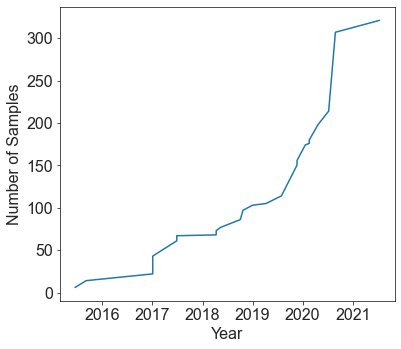

In [6]:
DF_metadata_passed['ReleaseDate'] = pd.to_datetime(DF_metadata_passed['ReleaseDate'])

first_date = min(DF_metadata_passed['ReleaseDate'])
last_date = max(DF_metadata_passed['ReleaseDate'])
date_range = pd.date_range(start=first_date,end=last_date,freq='YS')

fig,ax = plt.subplots(figsize=(6,6))
growth = DF_metadata_passed['ReleaseDate'].value_counts().sort_index().cumsum()
growth.plot(ax=ax)
plt.xticks(date_range,date_range.strftime('%Y'),rotation=0,ha='center')
ax.tick_params(labelsize=16)
ax.set_xlabel('Year',fontsize=16)
ax.set_ylabel('Number of Samples',fontsize=16)

In [7]:
fig.savefig("./raw_files_new/FigS1_B.svg")